In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

# Visualização do conjunto de dados

In [3]:
soja_mensal = pd.read_csv("database/soja_mensal1.csv", index_col=0)
soja_mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 0 to 350
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       351 non-null    int64  
 1   ano                       351 non-null    int64  
 2   ano_mes                   351 non-null    object 
 3   estoque                   312 non-null    float64
 4   exportacao                337 non-null    float64
 5   processamento             312 non-null    float64
 6   compra_liquida            312 non-null    float64
 7   importacao                322 non-null    float64
 8   saldo                     312 non-null    float64
 9   producao                  315 non-null    float64
 10  chicago_cbot_u$/t         349 non-null    float64
 11  fob_porto_paranagua_u$/t  349 non-null    float64
 12  maringa_r$/saca           349 non-null    float64
 13  mogiana_r$/saca           349 non-null    float64
 14  passofundo_r$/s

In [4]:
soja_mensal["ano_mes"] = pd.to_datetime(soja_mensal["ano_mes"])
soja_mensal = soja_mensal.dropna()
soja_mensal.info()
soja_mensal

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 38 to 349
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mes                       296 non-null    int64         
 1   ano                       296 non-null    int64         
 2   ano_mes                   296 non-null    datetime64[ns]
 3   estoque                   296 non-null    float64       
 4   exportacao                296 non-null    float64       
 5   processamento             296 non-null    float64       
 6   compra_liquida            296 non-null    float64       
 7   importacao                296 non-null    float64       
 8   saldo                     296 non-null    float64       
 9   producao                  296 non-null    float64       
 10  chicago_cbot_u$/t         296 non-null    float64       
 11  fob_porto_paranagua_u$/t  296 non-null    float64       
 12  maringa_r$/saca           

,mes,ano,ano_mes,estoque,exportacao,processamento,compra_liquida,importacao,saldo,producao,chicago_cbot_u$/t,fob_porto_paranagua_u$/t,maringa_r$/saca,mogiana_r$/saca,passofundo_r$/saca,rondonopolis_r$/saca,usdbrl
38,3,1999,1999-03-01,5121.27,523.877889,1799.80,5626.6,19.050000,3826.79,10354.41,177.021013,169.304477,16.740,16.780,17.40,14.390,1.8900
39,4,1999,1999-04-01,8237.95,1568.170612,2317.33,5434.0,132.404010,3116.68,4392.78,177.733874,170.752246,15.280,15.360,15.94,13.020,1.7300
40,5,1999,1999-05-01,7731.05,1860.894337,2483.90,1977.0,68.982000,-506.90,1568.85,171.648834,167.514975,15.290,15.200,15.72,13.200,1.6700
41,6,1999,1999-06-01,6656.48,1422.179649,2234.57,1160.0,102.503235,-1074.57,627.54,169.969568,172.174293,16.010,15.930,16.31,13.820,1.7700
42,7,1999,1999-07-01,5429.49,1252.347954,2045.99,819.0,75.659139,-1226.99,627.54,159.037809,166.938072,15.650,15.640,15.82,13.830,1.8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,8,2024,2024-08-01,14094.00,8041.521901,4368.00,1065.0,50.174977,-3303.00,1535.00,360.238794,408.925919,131.000,131.600,131.30,128.600,5.5079
346,9,2024,2024-09-01,11915.00,6106.462842,4194.00,2014.0,15.000000,-2179.00,0.00,372.318713,431.753750,138.375,137.375,136.00,134.000,5.5988
347,10,2024,2024-10-01,9149.00,4709.986654,4447.00,1682.0,0.000052,-2766.00,0.00,369.673072,429.126483,142.750,138.250,136.50,141.125,5.6030
348,11,2024,2024-11-01,6693.00,2553.033885,4145.00,1688.0,3.158000,-2456.00,0.00,366.163925,418.340906,141.600,140.100,136.80,152.100,5.7378


In [5]:
soja_mensal.describe()

,mes,ano,ano_mes,estoque,exportacao,processamento,compra_liquida,importacao,saldo,producao,chicago_cbot_u$/t,fob_porto_paranagua_u$/t,maringa_r$/saca,mogiana_r$/saca,passofundo_r$/saca,rondonopolis_r$/saca,usdbrl
count,296.000000,296.000000,296,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,6.500000,2011.685811,2012-02-22 07:51:53.513513472,9543.586486,3828.584383,3040.371318,3108.463345,37.835210,67.881655,7199.561318,360.302191,382.011736,68.968194,68.403052,70.173442,64.654166,3.064422
min,1.000000,1999.000000,1999-03-01 00:00:00,294.020000,0.284016,820.480000,-766.860000,0.000052,-4991.250000,0.000000,158.997389,158.997389,15.280000,15.200000,15.720000,13.020000,1.564500
25%,3.000000,2005.000000,2005-05-24 06:00:00,4158.017500,918.317821,2369.997500,827.002500,6.325258,-2138.927500,0.000000,236.237389,244.069903,34.895000,35.457500,35.815000,31.660000,2.010875
50%,7.000000,2012.000000,2012-04-16 00:00:00,8329.865000,2570.086635,2996.740000,1520.525000,19.623590,-1310.670000,1585.925000,356.549058,385.374670,54.834091,52.501136,52.690000,51.325000,2.714500
75%,9.250000,2018.000000,2018-08-08 18:00:00,14052.007500,5276.812800,3666.087500,3990.280000,58.779107,1025.912500,9536.575000,471.153743,498.165318,79.487500,78.100000,81.750000,76.237500,3.863075
max,12.000000,2024.000000,2024-12-01 00:00:00,29408.280000,16114.936472,5099.110000,19129.430000,168.726045,14812.450000,52899.000000,623.452415,731.394420,199.500000,199.750000,209.750000,188.625000,6.089400
std,3.467036,7.539676,NaN,6684.290257,3738.025660,893.290673,3668.811512,40.371292,3605.510306,11548.040131,126.729642,136.928115,46.449037,46.915403,47.535504,45.499215,1.264203


In [6]:
soja_mensal.tail(12)

,mes,ano,ano_mes,estoque,exportacao,processamento,compra_liquida,importacao,saldo,producao,chicago_cbot_u$/t,fob_porto_paranagua_u$/t,maringa_r$/saca,mogiana_r$/saca,passofundo_r$/saca,rondonopolis_r$/saca,usdbrl
338,1,2024,2024-01-01,6703.0,2854.885830,3478.0,4596.0,122.542916,1052.02,15350.0,453.176085,434.656605,117.625,123.500,127.50,113.875,4.8539
339,2,2024,2024-02-01,14031.0,6608.137654,3652.0,10980.0,35.693650,7328.00,50655.0,427.551041,390.806041,110.500,115.250,119.00,104.250,4.9522
340,3,2024,2024-03-01,19841.0,12600.297224,4378.0,10184.0,41.978186,5810.00,50655.0,433.958450,416.045262,116.700,119.500,119.30,111.100,4.9802
341,4,2024,2024-04-01,23848.0,14687.842087,4353.0,8360.0,165.650000,4007.00,21490.0,428.308906,424.175094,123.250,124.375,124.00,116.750,5.1183
342,5,2024,2024-05-01,23142.0,13436.722311,4289.0,3582.0,158.078129,-706.00,7675.0,446.561985,449.134135,130.700,133.300,131.10,123.000,5.1609
343,6,2024,2024-06-01,20017.0,13959.612086,4281.0,1156.0,141.498120,-3125.00,3070.0,430.949953,443.167666,132.000,135.875,135.50,126.125,5.3523
344,7,2024,2024-07-01,17397.0,11249.923995,4437.0,1817.0,86.770020,-2620.00,3070.0,408.200205,427.675055,132.250,135.875,135.25,127.500,5.4291
345,8,2024,2024-08-01,14094.0,8041.521901,4368.0,1065.0,50.174977,-3303.00,1535.0,360.238794,408.925919,131.000,131.600,131.30,128.600,5.5079
346,9,2024,2024-09-01,11915.0,6106.462842,4194.0,2014.0,15.000000,-2179.00,0.0,372.318713,431.753750,138.375,137.375,136.00,134.000,5.5988
347,10,2024,2024-10-01,9149.0,4709.986654,4447.0,1682.0,0.000052,-2766.00,0.0,369.673072,429.126483,142.750,138.250,136.50,141.125,5.6030


array([[<Axes: title={'center': 'mes'}>, <Axes: title={'center': 'ano'}>,
        <Axes: title={'center': 'ano_mes'}>,
        <Axes: title={'center': 'estoque'}>],
       [<Axes: title={'center': 'exportacao'}>,
        <Axes: title={'center': 'processamento'}>,
        <Axes: title={'center': 'compra_liquida'}>,
        <Axes: title={'center': 'importacao'}>],
       [<Axes: title={'center': 'saldo'}>,
        <Axes: title={'center': 'producao'}>,
        <Axes: title={'center': 'chicago_cbot_u$/t'}>,
        <Axes: title={'center': 'fob_porto_paranagua_u$/t'}>],
       [<Axes: title={'center': 'maringa_r$/saca'}>,
        <Axes: title={'center': 'mogiana_r$/saca'}>,
        <Axes: title={'center': 'passofundo_r$/saca'}>,
        <Axes: title={'center': 'rondonopolis_r$/saca'}>],
       [<Axes: title={'center': 'usdbrl'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

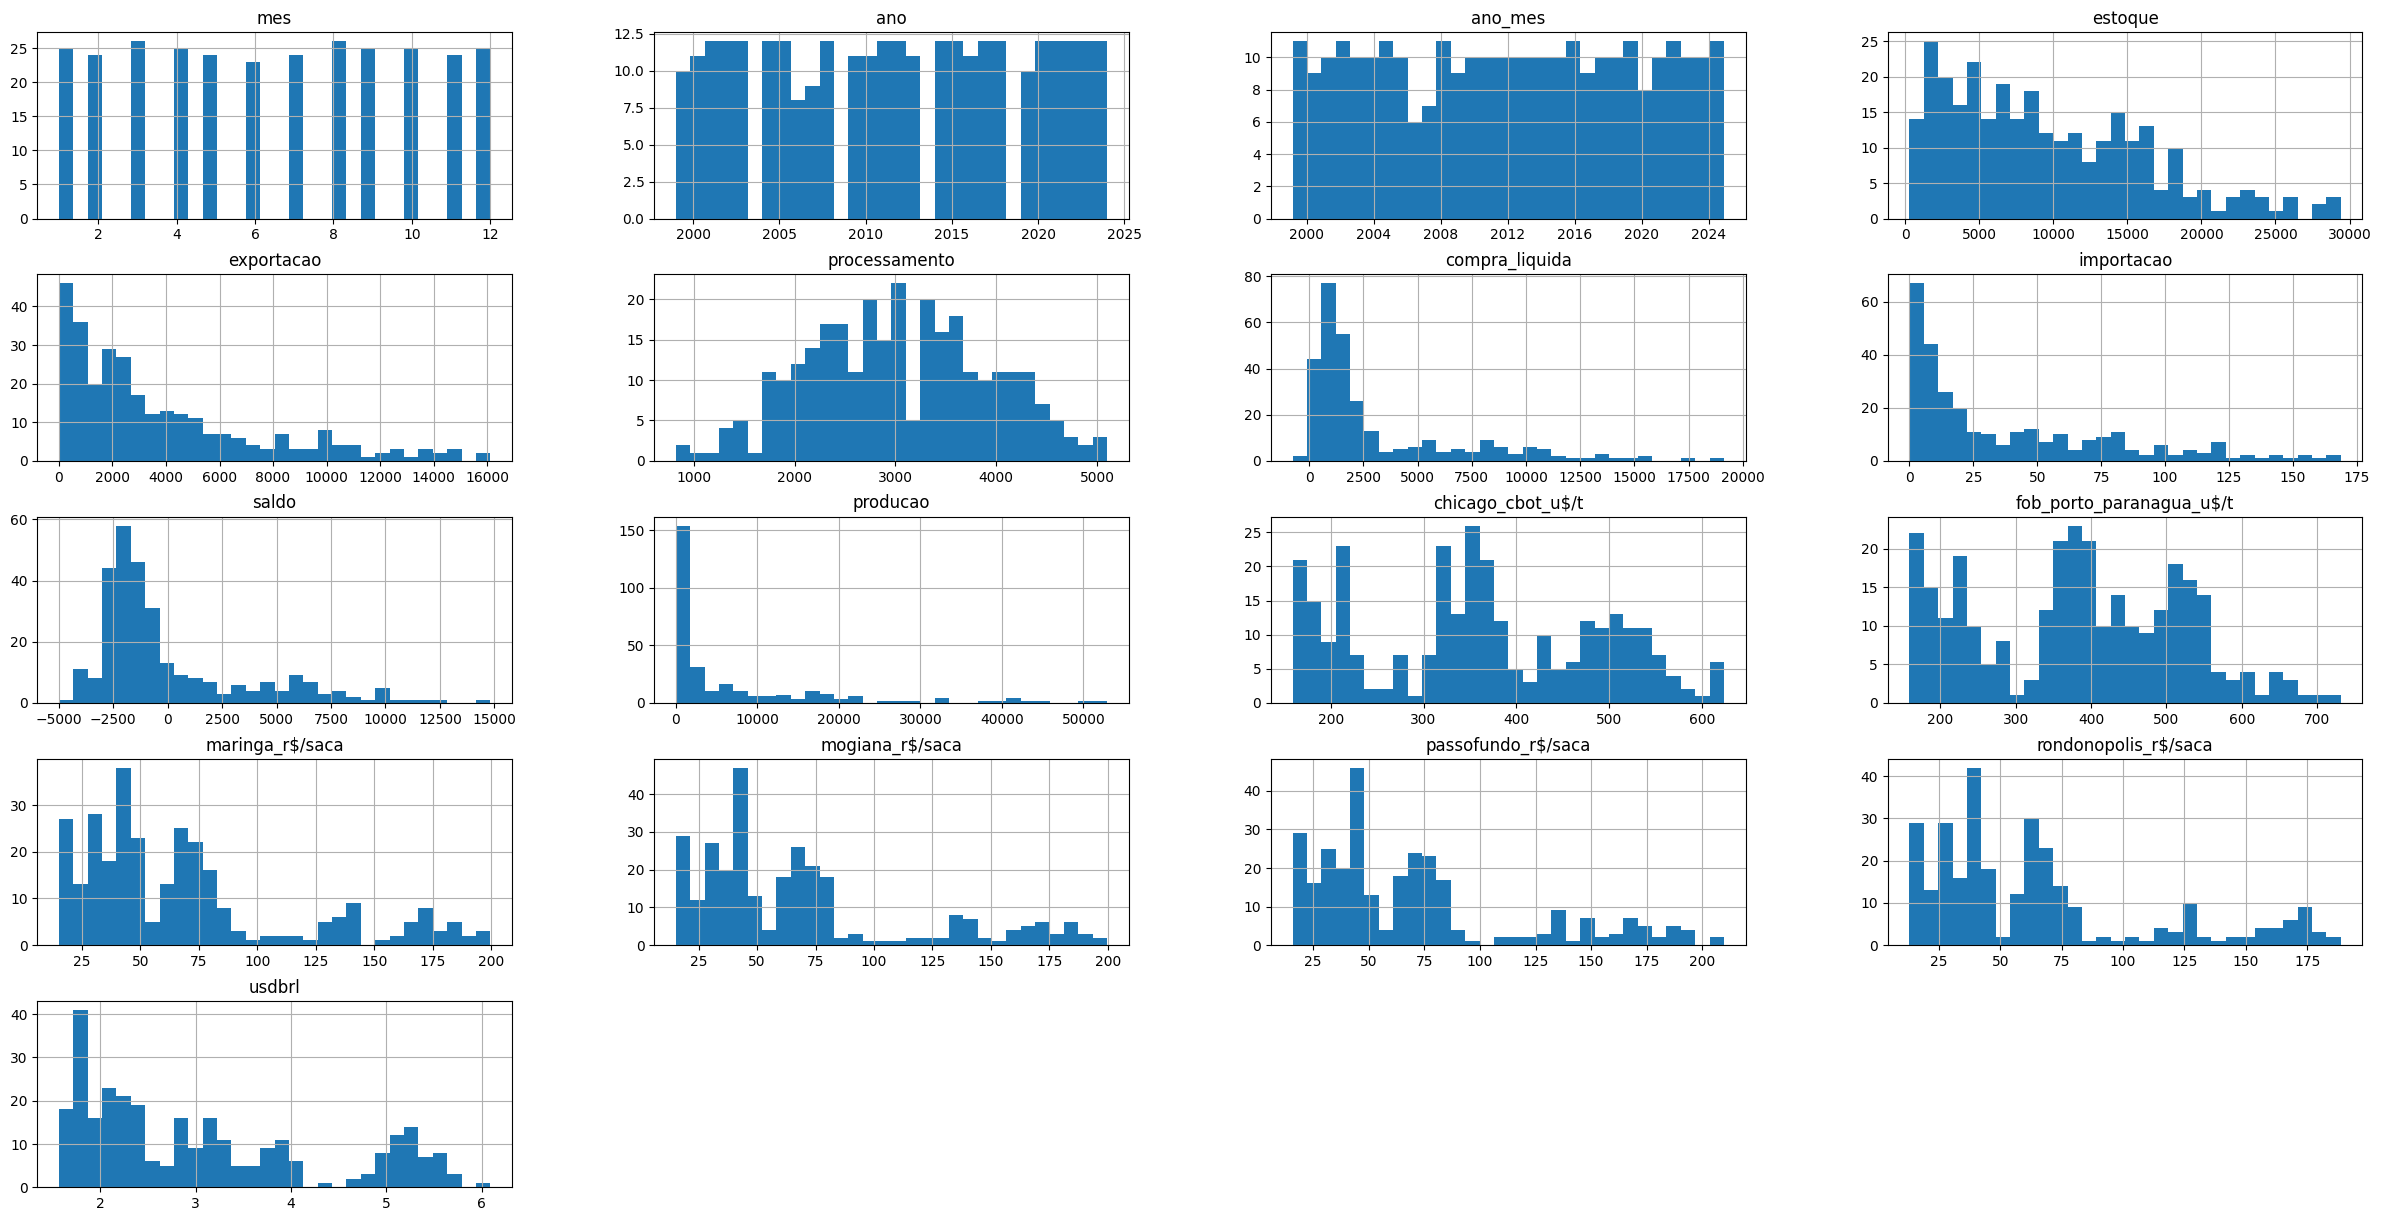

In [7]:
soja_mensal.hist(bins=30, figsize=(30, 15))

In [8]:
soja_mensal.corr()["rondonopolis_r$/saca"].sort_values(ascending=False)

rondonopolis_r$/saca        1.000000
maringa_r$/saca             0.997775
mogiana_r$/saca             0.996900
passofundo_r$/saca          0.995150
usdbrl                      0.878289
ano_mes                     0.858834
ano                         0.856146
processamento               0.749614
fob_porto_paranagua_u$/t    0.674681
chicago_cbot_u$/t           0.651758
exportacao                  0.525177
estoque                     0.397011
producao                    0.186229
compra_liquida              0.129785
importacao                  0.061940
mes                         0.057381
saldo                      -0.053722
Name: rondonopolis_r$/saca, dtype: float64

# Preparação dos dados para o Machine Learning

In [9]:
# limpar df por preco para treinar o modelo
soja_rondonopolis = soja_mensal.drop(['ano', 'mes', 'compra_liquida', 'chicago_cbot_u$/t','fob_porto_paranagua_u$/t', 'maringa_r$/saca', 'mogiana_r$/saca', 'passofundo_r$/saca', 'saldo'], axis=1)
soja_rondonopolis["ano_mes"] = soja_rondonopolis["ano_mes"].astype(np.int64) // 10**9
soja_rondonopolis.info()

soja_rondonopolis


<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 38 to 349
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ano_mes               296 non-null    int64  
 1   estoque               296 non-null    float64
 2   exportacao            296 non-null    float64
 3   processamento         296 non-null    float64
 4   importacao            296 non-null    float64
 5   producao              296 non-null    float64
 6   rondonopolis_r$/saca  296 non-null    float64
 7   usdbrl                296 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.8 KB


,ano_mes,estoque,exportacao,processamento,importacao,producao,rondonopolis_r$/saca,usdbrl
38,920246400,5121.27,523.877889,1799.80,19.050000,10354.41,14.390,1.8900
39,922924800,8237.95,1568.170612,2317.33,132.404010,4392.78,13.020,1.7300
40,925516800,7731.05,1860.894337,2483.90,68.982000,1568.85,13.200,1.6700
41,928195200,6656.48,1422.179649,2234.57,102.503235,627.54,13.820,1.7700
42,930787200,5429.49,1252.347954,2045.99,75.659139,627.54,13.830,1.8100
...,...,...,...,...,...,...,...,...
345,1722470400,14094.00,8041.521901,4368.00,50.174977,1535.00,128.600,5.5079
346,1725148800,11915.00,6106.462842,4194.00,15.000000,0.00,134.000,5.5988
347,1727740800,9149.00,4709.986654,4447.00,0.000052,0.00,141.125,5.6030
348,1730419200,6693.00,2553.033885,4145.00,3.158000,0.00,152.100,5.7378


In [10]:
soja_rondonopolis.corr()["rondonopolis_r$/saca"].sort_values(ascending=False)

rondonopolis_r$/saca    1.000000
usdbrl                  0.878289
ano_mes                 0.858834
processamento           0.749614
exportacao              0.525177
estoque                 0.397011
producao                0.186229
importacao              0.061940
Name: rondonopolis_r$/saca, dtype: float64

# Treinamento de modelos de Machine Learning

In [11]:
from sklearn.model_selection import train_test_split

Y = soja_rondonopolis["rondonopolis_r$/saca"]
X = soja_rondonopolis.loc[:, soja_rondonopolis.columns != 'rondonopolis_r$/saca']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

## LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # Aqui ele vai utilizar a função custo para fazer a otimização do modelo
preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)
lin_rmse = np.sqrt(lin_mse)

In [13]:
alguns_dados = x_train.iloc[0:5]
algumas_labels = y_train.iloc[0:5]

print("Predições:", lin_reg.predict(alguns_dados))
print("Labels:", algumas_labels.values)
print("-----")
print("lin_mse:", lin_mse)
print("lin_rmse:", lin_rmse)

Predições: [-0.11809456 69.77018878 35.0164425  54.30358468 38.91165819]
Labels: [16.54       60.9        46.36666667 75.88       40.4       ]
-----
lin_mse: 260.54848526510915
lin_rmse: 16.141514342375352


## DecisionTree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(
    max_depth=5,            # Profundidade máxima da árvore (limita a complexidade)
    min_samples_split=10,   # Número mínimo de amostras para dividir um nó
    min_samples_leaf=5      # Número mínimo de amostras em uma folha
)
tree_reg.fit(x_train, y_train)
preds1 = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds1)
tree_rmse = np.sqrt(tree_mse)



In [15]:
print("Predições:", tree_reg.predict(alguns_dados))
print("Labels:", algumas_labels.values)
print("-----")
print("tree_mse:", tree_mse)
print("tree_rmse:", tree_rmse)

Predições: [17.455      60.07546875 41.38863095 69.20935185 41.38863095]
Labels: [16.54       60.9        46.36666667 75.88       40.4       ]
-----
tree_mse: 38.30067586803505
tree_rmse: 6.188753983479635


## RandomForest Regressors - Modelo Promissor

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
preds2 = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds2)
rf_rmse = np.sqrt(rf_mse)

In [17]:
print("Predições:", rf_reg.predict(alguns_dados))
print("Labels:", algumas_labels.values)
print("-----")
print("rf_mse:", rf_mse)
print("rf_rmse:", rf_rmse)

Predições: [16.8526     61.41875    45.45785    72.80709167 41.46958333]
Labels: [16.54       60.9        46.36666667 75.88       40.4       ]
-----
rf_mse: 6.931393379799076
rf_rmse: 2.6327539535245363


## Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [15.75387436 16.43304084 15.20433593 14.00067597 16.75568315 12.82060235
 17.11928916 22.30900148 20.06832848 18.62656288]
Mean: 16.909139459775737
Standard deviation: 2.6795372359284344


In [19]:
scores1 = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores1)

def display_scores(scores1):
    print("Scores:", scores1)
    print("Mean:", scores1.mean())
    print("Standard deviation:", scores1.std())

display_scores(tree_rmse_scores)

Scores: [ 7.28878243 14.37805592  5.19135083  4.48030668 13.30167909  6.7851283
 12.96972374 10.97768849  5.97219003  6.92031955]
Mean: 8.826522505400252
Standard deviation: 3.5079481866696143


In [20]:
scores2 = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores2)

def display_scores(scores2):
    print("Scores:", scores2)
    print("Mean:", scores2.mean())
    print("Standard deviation:", scores2.std())

display_scores(rf_rmse_scores)

Scores: [6.72673457 7.91035905 4.42028364 4.05112585 9.40444889 4.64834403
 7.13410446 8.96915337 7.51869968 6.87952406]
Mean: 6.766277760611748
Standard deviation: 1.7663163669063797


-- -- -- -- --
Após o Cross-Validation detectamos que o **RandomForest Regressors** se comportou melhor no treinamento - Modelo Promissor!
-- -- -- -- --

# Avaliar e otimizar Modelo Promissor de Machine Learning

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
final_model = grid_search.best_estimator_
preds_final = final_model.predict(x_train)
final_mse = mean_squared_error(y_train, preds_final)
final_rmse = np.sqrt(final_mse)

In [22]:
print("estimator:", grid_search.best_estimator_)
print("params:", grid_search.best_params_)
print("score:", grid_search.best_score_)
print("index:", grid_search.best_index_)

estimator: RandomForestRegressor(max_features=8, n_estimators=30)
params: {'max_features': 8, 'n_estimators': 30}
score: -58.27772068217996
index: 11


In [23]:
print("Predições:", final_model.predict(alguns_dados))
print("Labels:", algumas_labels.values)
print("-----")
print("final_mse:", final_mse)
print("final_rmse:", final_rmse)

Predições: [16.37333333 61.32166667 44.90222222 74.02216667 41.06333333]
Labels: [16.54       60.9        46.36666667 75.88       40.4       ]
-----
final_mse: 6.946769358012775
final_rmse: 2.6356724678936825


Avaliando modelo otimizado com os dados de teste

In [24]:
final_model = grid_search.best_estimator_
preds_test = final_model.predict(x_test)
test_mse = mean_squared_error(y_test, preds_test)
test_rmse = np.sqrt(test_mse)

In [25]:
test_dados = x_test.iloc[0:5]
test_labels = y_test.iloc[0:5]

print("Predições:", final_model.predict(test_dados))
print("Labels:", test_labels.values)
print("-----")
print("final_mse:", test_mse)
print("final_rmse:", test_rmse)

Predições: [27.25055556 25.672      14.84933333 69.08333333 79.12833333]
Labels: [28.25  24.9   13.2   62.45  78.875]
-----
final_mse: 31.16839411346879
final_rmse: 5.582866119966409


In [ ]:
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                      go.Scatter(y=preds_test)])

fig.show()